In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from darwinian_shift import DarwinianShift, BinomTest
from darwinian_shift import SequenceDistanceLookup, MutationExclusionLookup, ANDLookup, ORLookup, ClinvarLookup
from darwinian_shift import hide_top_and_right_axes

/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [3]:
from statsmodels.stats.multitest import multipletests

In [4]:
d_skin = DarwinianShift(
    data = pd.read_excel('248092_3_supp_6645104_q35h43.xlsx', sheet_name='Table S4', skiprows=4),
    source_genome='GRCh37',
    spectra='skin_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=BinomTest()
)

In [5]:
d_oe = DarwinianShift(
    data=pd.read_excel('aau3879_TableS2.xlsx',
                       sheet_name='Mutations_collapsed_by_distance', skiprows=17),
    source_genome='GRCh37',
    spectra='oesophagus_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=BinomTest()
)

In [6]:
# Directories
sifts_directory="SIFTS_files"
pdb_directory = "PDB_files"
 
# Colours
unobserved_colour = '#BBBBBB'
observed_colour = '#EE7733'
foldx_expected_colour = '#EE6677'
foldx_observed_colour = '#CC3311'
interface_expected_colour = '#88CCEE'
interface_observed_colour = '#0077BB'
calcium_expected_colour = '#8DE0D7'
calcium_observed_colour = '#009988'

In [7]:
# Regions from https://www.pnas.org/content/109/38/15259.full 
# which contain mutations with effects on PIK3CA function.
regions = {
    '100_119': np.arange(100, 120),  
     '120_127': np.arange(120, 128),  
     '335_342': np.arange(335, 343),  
     '343_350': np.arange(343, 351),  
     '444_473': np.arange(444, 474),  
     '532_551': np.arange(532, 552),  
     '720_744':np.arange(720, 745),  
     '848_859':np.arange(848, 860),
     '930_956':np.arange(930, 957), 
     '962_980':np.arange(962, 981), 
     '1039_1055': np.arange(1039, 1056)  
    
}


pik3ca_section_definition = {'transcript_id':'ENST00000263967', 'included_mutation_types': 'missense',
                            'pdb_id': '4l1b', 'pdb_chain': 'A', 
                             'start_residue': [0],
                             
                             # Targets for structural distance
                            'p85_target': 'segid B',
                            }
pik3ca_section_definition.update(regions)

# Clinvar

In [8]:
cl = ClinvarLookup(clinvar_variant_summary_file="ClinVar_variant_summary.txt", 
                   assembly="GRCh37", clinsigsimple=False)

/var/folders/fz/0b7ldhcd0rb8rnh3wct1_92c000gly/T/ipykernel_18003/1403685766.py:1: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  cl = ClinvarLookup(clinvar_variant_summary_file="ClinVar_variant_summary.txt",


## Skin

In [9]:
s = d_skin.run_gene('PIK3CA', lookup=cl)

In [10]:
s.get_results_dictionary()

{'gene': 'PIK3CA',
 'transcript_id': 'ENST00000263967',
 'chrom': '3',
 'section_id': 'ENST00000263967',
 'num_mutations': 167,
 'observed_median': 0.0,
 'observed_mean': 0.11976047904191617,
 'expected_median_glob_k3': 0.0,
 'median_shift_glob_k3': 0.0,
 'expected_mean_glob_k3': 0.02365676941238351,
 'mean_shift_glob_k3': 0.09610370962953266,
 'binom_glob_k3_pvalue': 3.838415502839384e-09,
 'binom_glob_k3_expected_proportion': 0.02365676941238351,
 'binom_glob_k3_observed_proportion': 0.11976047904191617,
 'binom_glob_k3_expected_count': 3.950680491868046,
 'binom_glob_k3_observed_count': 20,
 'binom_glob_k3_threshold': 0.5,
 'binom_glob_k3_expected_CI_high': 8.0,
 'binom_glob_k3_expected_CI_low': 1.0,
 'binom_glob_k3_observed_CI_low': 12.0,
 'binom_glob_k3_observed_CI_high': 29.0}

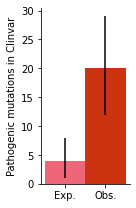

In [11]:
s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#CC3311', '#EE6677'])
plt.title("")
plt.ylabel('Pathogenic mutations in Clinvar')
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

## Oeosphagus

In [12]:
s = d_oe.run_gene('PIK3CA', lookup=cl)

In [13]:
s.get_results_dictionary()

{'gene': 'PIK3CA',
 'transcript_id': 'ENST00000263967',
 'chrom': '3',
 'section_id': 'ENST00000263967',
 'num_mutations': 49,
 'observed_median': 0.0,
 'observed_mean': 0.4489795918367347,
 'expected_median_glob_k3': 0.0,
 'median_shift_glob_k3': 0.0,
 'expected_mean_glob_k3': 0.018657991056523736,
 'mean_shift_glob_k3': 0.430321600780211,
 'binom_glob_k3_pvalue': 2.781755653692384e-25,
 'binom_glob_k3_expected_proportion': 0.018657991056523736,
 'binom_glob_k3_observed_proportion': 0.4489795918367347,
 'binom_glob_k3_expected_count': 0.9142415617696631,
 'binom_glob_k3_observed_count': 22,
 'binom_glob_k3_threshold': 0.5,
 'binom_glob_k3_expected_CI_high': 3.0,
 'binom_glob_k3_expected_CI_low': 0.0,
 'binom_glob_k3_observed_CI_low': 15.0,
 'binom_glob_k3_observed_CI_high': 29.0}

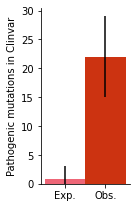

In [14]:
s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#CC3311', '#EE6677'])
plt.title("")
plt.ylabel('Pathogenic mutations in Clinvar')
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

# Enrichment of mutations in key regions

## Lookups

In [15]:
# Make a lookup for each of the regions to test. 
lookups = {}
lookups['l100'] = SequenceDistanceLookup(target_key='100_119', boolean=True)
lookups['l120'] = SequenceDistanceLookup(target_key='120_127', boolean=True)
lookups['l335'] = SequenceDistanceLookup(target_key='335_342', boolean=True)
lookups['l343'] = SequenceDistanceLookup(target_key='343_350', boolean=True)
lookups['l444'] = SequenceDistanceLookup(target_key='444_473', boolean=True)
lookups['l532'] = SequenceDistanceLookup(target_key='532_551', boolean=True)
lookups['l720'] = SequenceDistanceLookup(target_key='720_744', boolean=True)
lookups['l848'] = SequenceDistanceLookup(target_key='848_859', boolean=True)
lookups['l930'] = SequenceDistanceLookup(target_key='930_956', boolean=True)
lookups['l962'] = SequenceDistanceLookup(target_key='962_980', boolean=True)
lookups['l1039'] = SequenceDistanceLookup(target_key='1039_1055', boolean=True)

## Skin

In [16]:
# Analyse each of the sections individually and collect the results. 
all_muts_res_skin = []
for k, v in lookups.items():
    s = d_skin.run_section(pik3ca_section_definition, lookup=v)
    r = s.get_results_dictionary()
    r['lookup'] = k
    all_muts_res_skin.append(r)
    
all_muts_res_skin = pd.DataFrame(all_muts_res_skin)
# Run multiple test correction on the p-values
all_muts_res_skin['binom_glob_k3_qvalue'] = multipletests(all_muts_res_skin['binom_glob_k3_pvalue'], 
                                                          method='fdr_bh')[1]

In [17]:
all_muts_res_skin

,gene,transcript_id,chrom,section_id,num_mutations,observed_median,observed_mean,expected_median_glob_k3,median_shift_glob_k3,expected_mean_glob_k3,...,binom_glob_k3_observed_proportion,binom_glob_k3_expected_count,binom_glob_k3_observed_count,binom_glob_k3_threshold,binom_glob_k3_expected_CI_high,binom_glob_k3_expected_CI_low,binom_glob_k3_observed_CI_low,binom_glob_k3_observed_CI_high,lookup,binom_glob_k3_qvalue
0,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.089820,0.0,0.0,0.019995,...,0.089820,3.339192,15,0.5,7.0,0.0,8.0,23.0,l100,0.000009
1,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.011976,0.0,0.0,0.006735,...,0.011976,1.124700,2,0.5,4.0,0.0,0.0,5.0,l120,0.487389
2,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.000000,0.0,0.0,0.005986,...,0.000000,0.999630,0,0.5,3.0,0.0,0.0,0.0,l335,0.728128
3,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.017964,0.0,0.0,0.007197,...,0.017964,1.201873,3,0.5,4.0,0.0,0.0,7.0,l343,0.264640
4,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.107784,0.0,0.0,0.037540,...,0.107784,6.269177,18,0.5,11.0,2.0,11.0,26.0,l444,0.000236
5,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.000000,0.0,0.0,0.021418,...,0.000000,3.576862,0,0.5,8.0,0.0,0.0,0.0,l532,0.151766
6,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.005988,0.0,0.0,0.022561,...,0.005988,3.767636,1,0.5,8.0,0.0,0.0,3.0,l720,0.353809
7,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.011976,0.0,0.0,0.011166,...,0.011976,1.864770,2,0.5,5.0,0.0,0.0,5.0,l848,0.728128
8,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.011976,0.0,0.0,0.024971,...,0.011976,4.170090,2,0.5,8.0,1.0,0.0,5.0,l930,0.619867
9,PIK3CA,ENST00000263967,3,4l1b:A,167,0.0,0.083832,0.0,0.0,0.014892,...,0.083832,2.487030,14,0.5,6.0,0.0,7.0,21.0,l962,0.000003


In [18]:
all_muts_res_skin.sort_values('binom_glob_k3_qvalue')[
    ['num_mutations', 'binom_glob_k3_expected_count', 'binom_glob_k3_observed_count', 
     'lookup', 'binom_glob_k3_pvalue', 'binom_glob_k3_qvalue']
]

,num_mutations,binom_glob_k3_expected_count,binom_glob_k3_observed_count,lookup,binom_glob_k3_pvalue,binom_glob_k3_qvalue
9,167,2.487030,14,l962,2.695359e-07,0.000003
0,167,3.339192,15,l100,1.642572e-06,0.000009
4,167,6.269177,18,l444,6.444364e-05,0.000236
5,167,3.576862,0,l532,5.518772e-02,0.151766
3,167,1.201873,3,l343,1.202911e-01,0.264640
6,167,3.767636,1,l720,1.929866e-01,0.353809
1,167,1.124700,2,l120,3.101567e-01,0.487389
8,167,4.170090,2,l930,4.508120e-01,0.619867
2,167,0.999630,0,l335,6.310153e-01,0.728128
7,167,1.864770,2,l848,7.108740e-01,0.728128


## OE

In [19]:
# Analyse each of the sections individually and collect the results. 
all_muts_res_oe = []
for k, v in lookups.items():
    s = d_oe.run_section(pik3ca_section_definition, lookup=v)
    r = s.get_results_dictionary()
    r['lookup'] = k
    all_muts_res_oe.append(r)
    
all_muts_res_oe = pd.DataFrame(all_muts_res_oe)
# Run multiple test correction on the p-values
all_muts_res_oe['binom_glob_k3_qvalue'] = multipletests(all_muts_res_oe['binom_glob_k3_pvalue'], 
                                                        method='fdr_bh')[1]

In [20]:
all_muts_res_oe.sort_values('binom_glob_k3_qvalue')[
    ['num_mutations', 'binom_glob_k3_expected_count', 'binom_glob_k3_observed_count', 
     'lookup', 'binom_glob_k3_pvalue', 'binom_glob_k3_qvalue']
]

,num_mutations,binom_glob_k3_expected_count,binom_glob_k3_observed_count,lookup,binom_glob_k3_pvalue,binom_glob_k3_qvalue
10,49,0.873310,17,l1039,6.977094e-18,7.674803e-17
0,49,0.939670,8,l100,4.089185e-06,2.249052e-05
1,49,0.552159,0,l120,1.000000e+00,1.000000e+00
2,49,0.373910,0,l335,1.000000e+00,1.000000e+00
3,49,0.546007,1,l343,4.225145e-01,1.000000e+00
4,49,1.261599,1,l444,1.000000e+00,1.000000e+00
5,49,0.801225,0,l532,1.000000e+00,1.000000e+00
6,49,0.959270,0,l720,1.000000e+00,1.000000e+00
7,49,0.746929,0,l848,1.000000e+00,1.000000e+00
8,49,1.316708,0,l930,6.438305e-01,1.000000e+00


# Plotting signficant results

## Skin

{'gene': 'PIK3CA', 'transcript_id': 'ENST00000263967', 'chrom': '3', 'section_id': '4l1b:A', 'num_mutations': 167, 'observed_median': 0.0, 'observed_mean': 0.08982035928143713, 'expected_median_glob_k3': 0.0, 'median_shift_glob_k3': 0.0, 'expected_mean_glob_k3': 0.01999516307720108, 'mean_shift_glob_k3': 0.06982519620423605, 'binom_glob_k3_pvalue': 1.642571601387811e-06, 'binom_glob_k3_expected_proportion': 0.019995163077201082, 'binom_glob_k3_observed_proportion': 0.08982035928143713, 'binom_glob_k3_expected_count': 3.3391922338925806, 'binom_glob_k3_observed_count': 15, 'binom_glob_k3_threshold': 0.5, 'binom_glob_k3_expected_CI_high': 7.0, 'binom_glob_k3_expected_CI_low': 0.0, 'binom_glob_k3_observed_CI_low': 8.0, 'binom_glob_k3_observed_CI_high': 23.0}


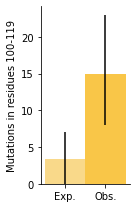

In [21]:
# 100-119
v = lookups['l100']
s = d_skin.run_section(pik3ca_section_definition, lookup=v)
print(s.get_results_dictionary())

s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#f9c648', '#f9d98a'])
plt.title("")
section_name = "-".join(v.target_key.split('_'))
plt.ylabel('Mutations in residues {}'.format(section_name))
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

{'gene': 'PIK3CA', 'transcript_id': 'ENST00000263967', 'chrom': '3', 'section_id': '4l1b:A', 'num_mutations': 167, 'observed_median': 0.0, 'observed_mean': 0.10778443113772455, 'expected_median_glob_k3': 0.0, 'median_shift_glob_k3': 0.0, 'expected_mean_glob_k3': 0.03753998077046632, 'mean_shift_glob_k3': 0.07024445036725824, 'binom_glob_k3_pvalue': 6.444363917088163e-05, 'binom_glob_k3_expected_proportion': 0.03753998077046632, 'binom_glob_k3_observed_proportion': 0.10778443113772455, 'binom_glob_k3_expected_count': 6.269176788667876, 'binom_glob_k3_observed_count': 18, 'binom_glob_k3_threshold': 0.5, 'binom_glob_k3_expected_CI_high': 11.0, 'binom_glob_k3_expected_CI_low': 2.0, 'binom_glob_k3_observed_CI_low': 10.0, 'binom_glob_k3_observed_CI_high': 26.0}


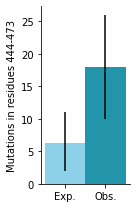

In [22]:
# 444-473
v = lookups['l444']
s = d_skin.run_section(pik3ca_section_definition, lookup=v)
print(s.get_results_dictionary())

s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#2395aa', '#8cd1e8'])
plt.title("")
section_name = "-".join(v.target_key.split('_'))
plt.ylabel('Mutations in residues {}'.format(section_name))
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

{'gene': 'PIK3CA', 'transcript_id': 'ENST00000263967', 'chrom': '3', 'section_id': '4l1b:A', 'num_mutations': 167, 'observed_median': 0.0, 'observed_mean': 0.08383233532934131, 'expected_median_glob_k3': 0.0, 'median_shift_glob_k3': 0.0, 'expected_mean_glob_k3': 0.014892396498306306, 'mean_shift_glob_k3': 0.06893993883103501, 'binom_glob_k3_pvalue': 2.695358753521695e-07, 'binom_glob_k3_expected_proportion': 0.014892396498306303, 'binom_glob_k3_observed_proportion': 0.08383233532934131, 'binom_glob_k3_expected_count': 2.4870302152171524, 'binom_glob_k3_observed_count': 14, 'binom_glob_k3_threshold': 0.5, 'binom_glob_k3_expected_CI_high': 6.0, 'binom_glob_k3_expected_CI_low': 0.0, 'binom_glob_k3_observed_CI_low': 7.0, 'binom_glob_k3_observed_CI_high': 21.0}


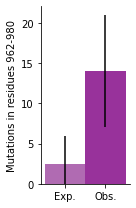

In [23]:
# 962-980
v = lookups['l962']
s = d_skin.run_section(pik3ca_section_definition, lookup=v)
print(s.get_results_dictionary())

s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#98329b', '#b06bb2'])
plt.title("")
section_name = "-".join(v.target_key.split('_'))
plt.ylabel('Mutations in residues {}'.format(section_name))
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

## Oesophagus/

{'gene': 'PIK3CA', 'transcript_id': 'ENST00000263967', 'chrom': '3', 'section_id': '4l1b:A', 'num_mutations': 49, 'observed_median': 0.0, 'observed_mean': 0.16326530612244897, 'expected_median_glob_k3': 0.0, 'median_shift_glob_k3': 0.0, 'expected_mean_glob_k3': 0.01917694588821233, 'mean_shift_glob_k3': 0.14408836023423663, 'binom_glob_k3_pvalue': 4.0891849377005535e-06, 'binom_glob_k3_expected_proportion': 0.019176945888212334, 'binom_glob_k3_observed_proportion': 0.16326530612244897, 'binom_glob_k3_expected_count': 0.9396703485224044, 'binom_glob_k3_observed_count': 8, 'binom_glob_k3_threshold': 0.5, 'binom_glob_k3_expected_CI_high': 3.0, 'binom_glob_k3_expected_CI_low': 0.0, 'binom_glob_k3_observed_CI_low': 3.0, 'binom_glob_k3_observed_CI_high': 13.0}


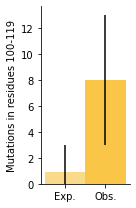

In [24]:
# 100-119
v = lookups['l100']
s = d_oe.run_section(pik3ca_section_definition, lookup=v)
print(s.get_results_dictionary())

s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#f9c648', '#f9d98a'])
plt.title("")
section_name = "-".join(v.target_key.split('_'))
plt.ylabel('Mutations in residues {}'.format(section_name))
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

{'gene': 'PIK3CA', 'transcript_id': 'ENST00000263967', 'chrom': '3', 'section_id': '4l1b:A', 'num_mutations': 49, 'observed_median': 0.0, 'observed_mean': 0.3469387755102041, 'expected_median_glob_k3': 0.0, 'median_shift_glob_k3': 0.0, 'expected_mean_glob_k3': 0.017822655293002525, 'mean_shift_glob_k3': 0.32911612021720155, 'binom_glob_k3_pvalue': 6.977093512673382e-18, 'binom_glob_k3_expected_proportion': 0.017822655293002528, 'binom_glob_k3_observed_proportion': 0.3469387755102041, 'binom_glob_k3_expected_count': 0.8733101093571238, 'binom_glob_k3_observed_count': 17, 'binom_glob_k3_threshold': 0.5, 'binom_glob_k3_expected_CI_high': 3.0, 'binom_glob_k3_expected_CI_low': 0.0, 'binom_glob_k3_observed_CI_low': 11.0, 'binom_glob_k3_observed_CI_high': 24.0}


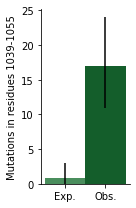

In [25]:
# 1039-1055
v = lookups['l1039']
s = d_oe.run_section(pik3ca_section_definition, lookup=v)
print(s.get_results_dictionary())

s.plot_binomial(figsize=(2, 3), show_legend=False, colours=['#145e2b', '#4a8e5d'])
plt.title("")
section_name = "-".join(v.target_key.split('_'))
plt.ylabel('Mutations in residues {}'.format(section_name))
hide_top_and_right_axes(plt.gca())
plt.tight_layout()

# Exclusion and deduplication

Tests for each region, deduplicating mutations (only counting each recurrent mutation once) and excluding other selected regions from the tests. 

In [26]:
d_skin_dedup = DarwinianShift(
    data = pd.read_excel('248092_3_supp_6645104_q35h43.xlsx', sheet_name='Table S4', skiprows=4),
    source_genome='GRCh37',
    spectra='skin_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=BinomTest(), 
    deduplicate=True
)

In [27]:
d_oe_dedup = DarwinianShift(
    data=pd.read_excel('aau3879_TableS2.xlsx',
                       sheet_name='Mutations_collapsed_by_distance', skiprows=17),
    source_genome='GRCh37',
    spectra='oesophagus_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=BinomTest(), 
    deduplicate=True
)

In [28]:
all_muts_res_exclusion_and_dedup = []

## Skin

In [29]:
other_lookups = [lookups['l444'], lookups['l962']]
selected_others = ORLookup(
    lookups=other_lookups,  
    thresholds=[0.5]*len(other_lookups),
    directions=[1]*len(other_lookups), 
)
l100_excl = MutationExclusionLookup(
    lookup=lookups['l100'], 
    exclusion_lookup=selected_others,   
    exclusion_threshold=0.5, 
    exclusion_direction=1,  
    name='100-119'
)

other_lookups = [lookups['l100'], lookups['l962']]
selected_others = ORLookup(
    lookups=other_lookups,  
    thresholds=[0.5]*len(other_lookups),
    directions=[1]*len(other_lookups), 
)
l444_excl = MutationExclusionLookup(
    lookup=lookups['l444'], 
    exclusion_lookup=selected_others,   
    exclusion_threshold=0.5, 
    exclusion_direction=1,  
    name='444-473'
)

other_lookups = [lookups['l100'], lookups['l444']]
selected_others = ORLookup(
    lookups=other_lookups,  
    thresholds=[0.5]*len(other_lookups),
    directions=[1]*len(other_lookups), 
)
l962_excl = MutationExclusionLookup(
    lookup=lookups['l962'], 
    exclusion_lookup=selected_others,   
    exclusion_threshold=0.5, 
    exclusion_direction=1,  
    name='962-980'
)

In [30]:
for v in [l100_excl, l444_excl, l962_excl] :
    
    s = d_skin_dedup.run_section(pik3ca_section_definition, lookup=v)
    res = s.get_results_dictionary()
    res['tissue'] = 'skin'
    res['test'] = v.name
    all_muts_res_exclusion_and_dedup.append(res)

### OE

In [31]:
l100_excl = MutationExclusionLookup(
    lookup=lookups['l100'], 
    exclusion_lookup=lookups['l1039'],   
    exclusion_threshold=0.5, 
    exclusion_direction=1,  
    name='100-199'
)


l1039_excl = MutationExclusionLookup(
    lookup=lookups['l1039'], 
    exclusion_lookup=lookups['l100'],   
    exclusion_threshold=0.5, 
    exclusion_direction=1,  
    name='1039-1055'
)


In [32]:
for v in [l100_excl, l1039_excl] :
    s = d_oe_dedup.run_section(pik3ca_section_definition, lookup=v)
    res = s.get_results_dictionary()
    res['tissue'] = 'Oesophagus'
    res['test'] = v.name
    all_muts_res_exclusion_and_dedup.append(res)

In [33]:
pd.DataFrame(all_muts_res_exclusion_and_dedup)[[
    'tissue', 'test', 'num_mutations', 
    'binom_glob_k3_expected_proportion', 'binom_glob_k3_observed_proportion', 
    'binom_glob_k3_pvalue']
]

,tissue,test,num_mutations,binom_glob_k3_expected_proportion,binom_glob_k3_observed_proportion,binom_glob_k3_pvalue
0,skin,100-119,114,0.021102,0.087719,1.619288e-04
1,skin,444-473,112,0.038897,0.071429,8.301969e-02
2,skin,962-980,109,0.015802,0.045872,2.987455e-02
3,Oesophagus,100-199,30,0.019525,0.233333,1.483453e-06
4,Oesophagus,1039-1055,31,0.018171,0.258065,6.453285e-08
